In [36]:
import lightgbm as lgb 
from sklearn.datasets import load_diabetes

In [37]:
from lgb2sql import lgb2sql

In [38]:
model = lgb.LGBMRegressor(n_estimators=10,max_depth=3)

In [39]:
X,y = load_diabetes(return_X_y=True)

In [40]:
model.fit(X,y)

LGBMRegressor(max_depth=3, n_estimators=10)

In [41]:
exporter = lgb2sql(model)

In [42]:
print(exporter.export_sql('aaa','custid','aa'))

SELECT 
 custid 
 ,subtree_0+subtree_1+subtree_2+subtree_3+subtree_4+subtree_5+subtree_6+subtree_7+subtree_8+subtree_9 AS Score 
 FROM( 
SELECT 
 custid 
,CASE 
WHEN f_8 <= 1.0000000180025095e-35 
  AND f_2 <= 0.006188884713822097 
 AND f_6 <= 0.021027815919496564 
THEN  147.8934691049083 
 WHEN f_8 <= 1.0000000180025095e-35 
  AND f_2 <= 0.006188884713822097 
 AND f_6 > 0.021027815919496564 
THEN  145.48831759066178 
 WHEN f_8 <= 1.0000000180025095e-35 
  AND f_2 > 0.006188884713822097 
 AND f_3 <= -0.016567045631320297 
THEN  150.66796185910738 
 WHEN f_8 <= 1.0000000180025095e-35 
  AND f_2 > 0.006188884713822097 
 AND f_3 > -0.016567045631320297 
THEN  155.12013577175767 
 WHEN f_8 > 1.0000000180025095e-35 
  AND f_2 <= 0.018044817526510912 
 AND f_2 <= -0.021834229207078684 
THEN  150.56116141330108 
 WHEN f_8 > 1.0000000180025095e-35 
  AND f_2 <= 0.018044817526510912 
 AND f_2 > -0.021834229207078684 
THEN  155.03329366770606 
 WHEN f_8 > 1.0000000180025095e-35 
  AND f_2 > 0.01

<AxesSubplot:>

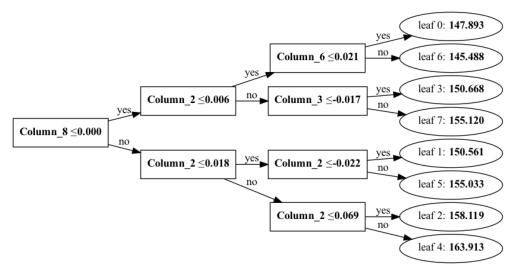

In [8]:
lgb.plot_tree(model)

In [26]:
model_info=model.booster_.dump_model()

In [27]:
model_info

{'name': 'tree',
 'version': 'v3',
 'num_class': 1,
 'num_tree_per_iteration': 1,
 'label_index': 0,
 'max_feature_idx': 9,
 'objective': 'regression',
 'average_output': False,
 'feature_names': ['Column_0',
  'Column_1',
  'Column_2',
  'Column_3',
  'Column_4',
  'Column_5',
  'Column_6',
  'Column_7',
  'Column_8',
  'Column_9'],
 'monotone_constraints': [],
 'feature_infos': {'Column_0': {'min_value': -0.1072256316073538,
   'max_value': 0.11072667545381144,
   'values': []},
  'Column_1': {'min_value': -0.04464163650698914,
   'max_value': 0.05068011873981862,
   'values': []},
  'Column_2': {'min_value': -0.09027529589850944,
   'max_value': 0.17055522598064407,
   'values': []},
  'Column_3': {'min_value': -0.11239880254408448,
   'max_value': 0.1320436167412131,
   'values': []},
  'Column_4': {'min_value': -0.12678066991651324,
   'max_value': 0.15391371315651542,
   'values': []},
  'Column_5': {'min_value': -0.11561306597939897,
   'max_value': 0.19878798965729408,
   'valu

In [47]:
model.predict([list(range(1,11))])

array([226.86147287])

In [12]:
173.23726199

173.23726199

In [13]:
import xgboost as xgb 

In [14]:
m1 = xgb.XGBRegressor()

In [15]:
m1.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [20]:
a = m1.get_booster()

In [22]:
a = a.get_dump(dump_format='json')

In [25]:
print(a[0])

  { "nodeid": 0, "depth": 0, "split": "f8", "split_condition": -0.00376117602, "yes": 1, "no": 2, "missing": 1 , "children": [
    { "nodeid": 1, "depth": 1, "split": "f2", "split_condition": 0.00618888484, "yes": 3, "no": 4, "missing": 3 , "children": [
      { "nodeid": 3, "depth": 2, "split": "f6", "split_condition": 0.0210278165, "yes": 7, "no": 8, "missing": 7 , "children": [
        { "nodeid": 7, "depth": 3, "split": "f8", "split_condition": -0.0761162713, "yes": 15, "no": 16, "missing": 15 , "children": [
          { "nodeid": 15, "leaf": 16.1571445 }, 
          { "nodeid": 16, "depth": 4, "split": "f3", "split_condition": -0.0865774155, "yes": 27, "no": 28, "missing": 27 , "children": [
            { "nodeid": 27, "leaf": 15.3375006 }, 
            { "nodeid": 28, "leaf": 33.5734177 }
          ]}
        ]}, 
        { "nodeid": 8, "depth": 3, "split": "f4", "split_condition": -0.104765423, "yes": 17, "no": 18, "missing": 17 , "children": [
          { "nodeid": 17, "leaf": 